# Titanic - Learning from a disaster 

In [1]:
#import necessary modules 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#import the dataset 

titanic_train = pd.read_csv("~/Desktop/DATASETS/titanic/train.csv")
titanic_test  = pd.read_csv("~/Desktop/DATASETS/titanic/test.csv")

## Exploratory Data Anlysis 

Lets have an overview of the dataset 

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have seen that both the Cabin and Age variables have missing values. How many of them specifically? 

In [4]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We will probabily need to drop Cabin variable because there are too many missing values in this column 

In [7]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

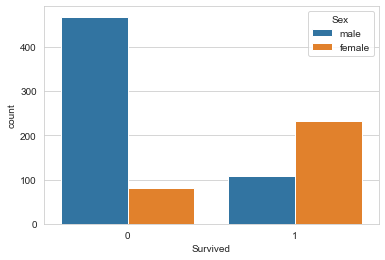

In [8]:
#how many people survived by gender

sns.set_style("whitegrid")
sns.countplot(data = titanic_train, x = "Survived", hue="Sex")

In [9]:
#How many people survived compared to classes and gender? 

titanic_train.groupby(["Sex","Pclass"]).sum().sort_values("Survived", ascending = False)


PassengerId  Survived      Age  SibSp  Parch       Fare
Sex    Pclass                                                         
female 1             44106        91  2942.00     52     43  9975.8250
       3             57561        72  2218.50    129    115  2321.1086
       2             33676        70  2125.50     37     46  1669.7292
male   3            158064        47  6706.42    173     78  4393.5865
       1             55599        45  4169.42     38     34  8201.5875
       2             48380        17  3043.33     37     24  2132.1125

In all classes Females survived more than Males, probably because females, children andelderly had were saved first.
Let's explore this hypothesis counting the number of males and females who died by classes and their age. 

In [10]:
titanic_train["Died"] = 1 - titanic_train["Survived"]

titanic_grouped = (
 titanic_train
    .groupby(["Sex","Pclass"])
    .agg({"Age": "mean",
          "Died": "sum"})
    .rename(columns={"Age":"Mean Age", 
                     "Died": "Total Died"})
    .sort_values("Total Died", ascending = False)
    .reset_index()
)

titanic_grouped


,Sex,Pclass,Mean Age,Total Died
0,male,3,26.507589,300
1,male,2,30.740707,91
2,male,1,41.281386,77
3,female,3,21.750000,72
4,female,2,28.722973,6
5,female,1,34.611765,3


In [11]:
#Drop the died column 
titanic_train = titanic_train.drop("Died", 1)

The avarage age of people who died is around 30, so we can confirm the hypotheis above. These are the people who helped othes svaed first rather then themselves. 

<AxesSubplot:xlabel='Pclass', ylabel='Total Died'>

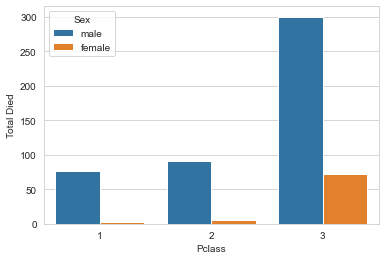

In [12]:
#Let's visualize the results 

sns.barplot(data = titanic_grouped, x = "Pclass", y = "Total Died", hue="Sex")

How the numerical variables are distributed? 

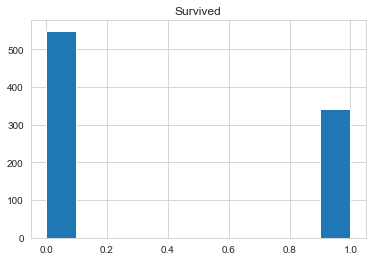

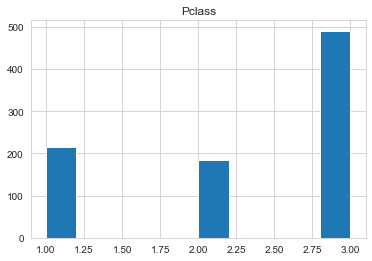

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


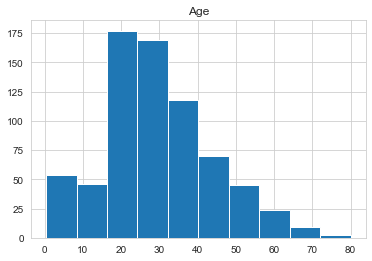

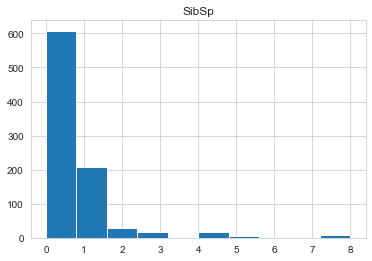

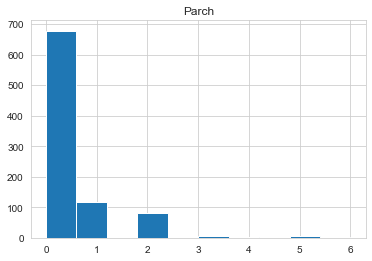

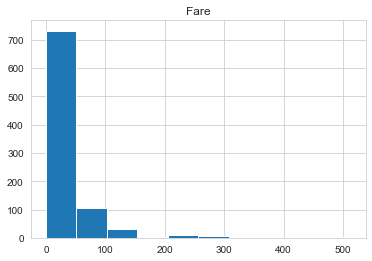

In [13]:
titanic_train_num = titanic_train[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]

for x in titanic_train_num: 
    plt.hist(titanic_train_num[x])
    plt.title(x)
    plt.show()

Now let's have alook at the categorical variables 

In [14]:
titanic_train_cat = titanic_train[["Sex", "Cabin", "Embarked", "Ticket"]]

for x in titanic_train_cat:
    y = titanic_train[x].value_counts()
    print(f"Variable: {x}")
    print(y)
    print(" ")

Variable: Sex
male      577
female    314
Name: Sex, dtype: int64
 
Variable: Cabin
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
F2             3
              ..
C95            1
E36            1
A24            1
D56            1
F E69          1
Name: Cabin, Length: 147, dtype: int64
 
Variable: Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
 
Variable: Ticket
347082           7
1601             7
CA. 2343         7
347088           6
CA 2144          6
                ..
112277           1
4136             1
315094           1
350042           1
SC/PARIS 2149    1
Name: Ticket, Length: 681, dtype: int64
 


We can drop both Ticket and Cabin variables because not consistent.

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

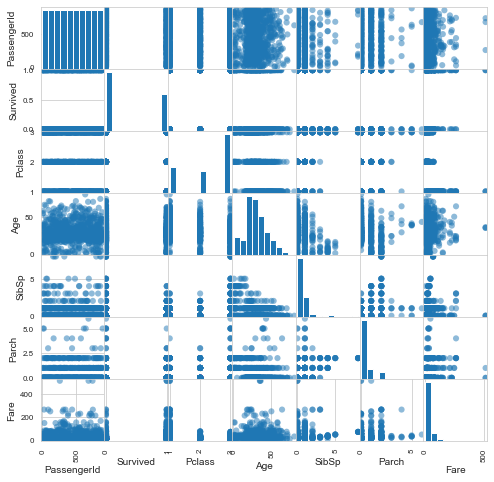

In [15]:
#Visualize the numerical variables again 
pd.plotting.scatter_matrix(titanic_train, figsize = [8, 8], s = 150)

In [19]:
#SibSP is the number of sibiligs and Parch represents parants, hence we cann add a new variable called Family Size 
titanic_train["FamilySize"] = titanic_train["SibSp"] + titanic_train["Parch"] + 1
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"] + 1

In [33]:
#Majority of people were travelling alone (60%), while 27% were traveling with 1-2 person from their family
titanic_train["FamilySize"].value_counts(normalize = True, ascending=False)*100

1     60.269360
2     18.069585
3     11.447811
4      3.254770
6      2.469136
5      1.683502
7      1.346801
11     0.785634
8      0.673401
Name: FamilySize, dtype: float64

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

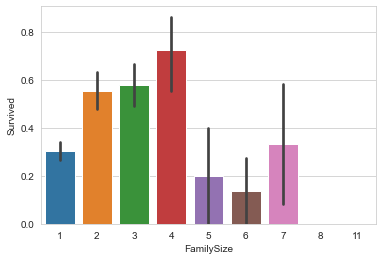

In [35]:
#People who were travelling with others survived more than who was travelling alone 
sns.barplot(x = titanic_train["FamilySize"], y = titanic_train["Survived"])

In [51]:
#Let's estrapolate the surname from the name column 
titanic_train["Surname"] = titanic_train["Name"].str.split(",").str.get(0)
titanic_test["Surname"] = titanic_test["Name"].str.split(",").str.get(0)

In [52]:
titanic_train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Behr


### Feautures Engineering 

In [286]:
# One hot encoding with pandas

cat_features = ["Sex","Embarked"]
train_dummies = pd.get_dummies(titanic_train[cat_features])
test_dummies = pd.get_dummies(titanic_test[cat_features])

In [287]:
#Drop the columns for the X
X_dropped = titanic_train.drop(["PassengerId", "Survived", "Ticket", 
                              "Cabin", "Name", "Sex", "Embarked", "Surname"], axis = 1)

#Add the dummy variables to X
X = pd.concat([X_dropped, train_dummies], axis = 1)

#Isolate the target variable 
y = titanic_train["Survived"]

#Drop the column for the final test 
Final_test_dropped = titanic_test.drop(["PassengerId", "Ticket", "Cabin", 
                                        "Name", "Sex", "Embarked", "Surname"], axis = 1)

#Add the dummy variable to the final test X 
Final_test = pd.concat([Final_test_dropped, test_dummies], axis = 1)



In [571]:
print(X.shape)
print(y.shape)
X.sample(3)

(891, 11)
(891,)


,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
225,3,22.000000,0,0,9.35,1,0,1,0,0,1
563,3,26.666667,0,0,8.05,1,0,1,0,0,1
540,1,36.000000,0,2,71.00,3,1,0,0,0,1


In [293]:
# Dealing with Age missing values 
X = X.interpolate(method = "linear", axis = 0).bfill().ffill()
print(f"Missing Values in X:\n{X.isnull().any().sum()}")
print(" ")

Final_test = Final_test.interpolate(method = "linear", axis = 0).bfill().ffill()
print(f"Missing values in Final_test:\n{Final_test.isnull().any().sum()}")

Missing Values in X:
0
 
Missing values in Final_test:
0


In [294]:
#Split the data 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 42)

In [306]:
#Import the necessary modules from sklearn 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler 
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Logistic Regression 

In [302]:
from sklearn.linear_model import LogisticRegression 

pipeline = make_pipeline(RobustScaler(), LogisticRegression(C = 1, random_state = 12))

pipeline.fit(X_train, y_train)
log_pred = pipeline.predict(X_test)

print(f"Score on the training set: {pipeline.score(X_train, y_train)}")
print(f"Score on the testing set: {pipeline.score(X_test, y_test)}")

Score on the training set: 0.8044914134742405
Score on the testing set: 0.7686567164179104


In [303]:
print(confusion_matrix(y_test, log_pred))

[[71 12]
 [19 32]]


In [304]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        83
           1       0.73      0.63      0.67        51

    accuracy                           0.77       134
   macro avg       0.76      0.74      0.75       134
weighted avg       0.77      0.77      0.76       134



### KNN 

In [326]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = make_pipeline(StandardScaler(), MinMaxScaler(),
                             KNeighborsClassifier(n_neighbors=4))


knn_pipeline.fit(X_train, y_train)
knn_pred = pipeline.predict(X_test)

print(f"Score on the training set: {knn_pipeline.score(X_train, y_train)}")
print(f"Score on the testing set: {knn_pipeline.score(X_test, y_test)}")


Score on the training set: 0.845442536327609
Score on the testing set: 0.7910447761194029


### Random Forest 

In [467]:
from sklearn.ensemble import RandomForestClassifier 
 
rand_RF = make_pipeline(RobustScaler(), 
                        RandomForestClassifier(random_state=42, n_estimators=1000, class_weight="balanced"))

print(cross_val_score(rand_RF, X_train, y_train, cv = 5))
print(np.mean(cross_val_score(rand_RF, X_train, y_train, cv = 5, scoring="roc_auc")))

[0.79605263 0.76973684 0.82119205 0.86092715 0.78145695]
0.8591967193584089


In [468]:
rand_RF.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=1000, random_state=42))])

In [469]:
print(f"Score on the training set: {rand_RF.score(X_train, y_train)}")
print(f"Score on the testing set: {rand_RF.score(X_test, y_test)}")

Score on the training set: 0.9907529722589168
Score on the testing set: 0.746268656716418


In [470]:
rand_RF_pred = rand_RF.predict(X_test)

In [471]:
print(confusion_matrix(y_test, rand_RF_pred))

[[69 14]
 [20 31]]


In [472]:
print(classification_report(y_test, rand_RF_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        83
           1       0.69      0.61      0.65        51

    accuracy                           0.75       134
   macro avg       0.73      0.72      0.72       134
weighted avg       0.74      0.75      0.74       134



### Gradient Bosting Decision Tree

In [388]:
from sklearn.ensemble import GradientBoostingClassifier

gr_boost = make_pipeline(StandardScaler(), 
                                  GradientBoostingClassifier(random_state = 42))

print(cross_val_score(gr_boost, X_train, y_train, cv = 5))

print(np.mean(cross_val_score(gr_boost, X_train, y_train, cv = 5, scoring="roc_auc")))


[0.81578947 0.78947368 0.84768212 0.88741722 0.80794702]
0.8827041131435726


In [389]:
gr_boost.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [391]:
print(f"Score on the training test: {gr_boost.score(X_train, y_train)}")
print(f"Score on the testing set: {gr_boost.score(X_test, y_test)}")

Score on the training test: 0.8996036988110965
Score on the testing set: 0.7910447761194029


In [392]:
gr_boost_pred = gr_boost.predict(X_test)

In [393]:
print(confusion_matrix(y_test, gr_boost_pred))

[[74  9]
 [19 32]]


In [394]:
print(classification_report(y_test, gr_boost_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        83
           1       0.78      0.63      0.70        51

    accuracy                           0.79       134
   macro avg       0.79      0.76      0.77       134
weighted avg       0.79      0.79      0.79       134



### Neural Network 

In [572]:
from sklearn.neural_network import MLPClassifier

mlp = make_pipeline(StandardScaler(),  
                             MLPClassifier(random_state=0, max_iter=600, alpha=0.001, 
                                           hidden_layer_sizes=[9], beta_1=0.5))

print(cross_val_score(mlp, X_train, y_train, cv = 5))
print(np.mean(cross_val_score(mlp, X_train, y_train, cv = 5, scoring="roc_auc")))


[0.78289474 0.80263158 0.84768212 0.82781457 0.8013245 ]
0.8589191005860446


In [573]:
#fitting the mlp
mlp.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.001, beta_1=0.5, hidden_layer_sizes=[9],
                               max_iter=600, random_state=0))])

In [574]:
print(f"Score on the training set: {mlp.score(X_train, y_train)}")
print(f"Score on the testing set: {mlp.score(X_test, y_test)}")

Score on the training set: 0.8441215323645971
Score on the testing set: 0.8059701492537313


In [575]:
mlp_pred = mlp.predict(X_test)

In [576]:
print(confusion_matrix(y_test, mlp_pred))

[[78  5]
 [21 30]]


In [577]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        83
           1       0.86      0.59      0.70        51

    accuracy                           0.81       134
   macro avg       0.82      0.76      0.78       134
weighted avg       0.81      0.81      0.80       134



#### It seems that the Neural Network is the one that has performed the best 

## Predicting the unseen data 

In [578]:
predictions = mlp.predict(Final_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Save the best prediction 

In [561]:
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
